# **ANALISE EXPLORATÓRIA DE DADOS DAS BICICLETAS DE ALUGUEL DO ITAÚ**



# **PERGUNTAS DE NEGÓCIO:**

**1. O dia (dia útil, feriado, dia da semana e final de final de semana) impacta a demanda por bicicletas?**

**2. Existe uma concentração (picos e vales) da demanda por biciclieas ao longo do dia?**

**3. A Temperatura, Sensação Térmica, Vento e Umidade afetam a demananda por bicicletas? Se sim, Como?**

**4. O Clima e as Estações do ano influenciam na demenda por bicicletas?**

**5. Existe alguma anormalidade no uso das bicicletas ao longo do tempo? E se houver,qual foi o motivo?**

**6. Há alguma tendência crescente ou decrescente no uso das bicicletas ao longo do período de tempo analisado?**

Importando as biblioteca e dados

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from google.colab import drive
drive.mount('/content/gdrive')

df = pd.read_csv('drive/MyDrive/bicicletas.csv')
df.head()

,data_hora,contagem,temperatura,sensacao_termica,umidade,velocidade_vento,clima,feriado,fim_de_semana,estacao
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,Nublado,Não,Sim,Inverno
1,2015-01-04 01:00:00,138,NaN,NaN,93.0,5.0,Céu limpo,Não,Sim,Inverno
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,Céu limpo,Não,Sim,Inverno
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,Céu limpo,Não,Sim,Inverno
4,2015-01-04 04:00:00,47,NaN,NaN,93.0,6.5,Céu limpo,Não,Sim,Inverno


Limpeza e Pré-processamento: analisar dados faltantes, outliers, duplicata e padronizar formatos (categoria de variavel).

In [2]:
df.shape

(17429, 10)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17429 entries, 0 to 17428
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   data_hora         17429 non-null  object 
 1   contagem          17429 non-null  int64  
 2   temperatura       17406 non-null  float64
 3   sensacao_termica  17406 non-null  float64
 4   umidade           17429 non-null  float64
 5   velocidade_vento  17429 non-null  float64
 6   clima             17429 non-null  object 
 7   feriado           17429 non-null  object 
 8   fim_de_semana     17429 non-null  object 
 9   estacao           17429 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 1.3+ MB


**Dados Nulos**

In [4]:
df.isnull().sum()

,0
data_hora,0
contagem,0
temperatura,23
sensacao_termica,23
umidade,0
velocidade_vento,0
clima,0
feriado,0
fim_de_semana,0
estacao,0


Tratado valores nulos interpolando valores
(Média do valor anterior e seguinte ao valor nulo)

In [5]:
df["temperatura"] = df["temperatura"].interpolate(method='linear')
df["sensacao_termica"] = df["sensacao_termica"].interpolate(method='linear')

**Dados duplicados**

In [6]:
df.duplicated().sum()

np.int64(15)

Quais são as linhas duplicadas ordenadas pela coluna data_hora

In [7]:
df[df.duplicated(keep=False)].sort_values(by='data_hora')

,data_hora,contagem,temperatura,sensacao_termica,umidade,velocidade_vento,clima,feriado,fim_de_semana,estacao
519,2015-01-25 16:00:00,1238,8.0,5.0,71.0,18.0,Nublado,Não,Sim,Inverno
17422,2015-01-25 16:00:00,1238,8.0,5.0,71.0,18.0,Nublado,Não,Sim,Inverno
869,2015-02-09 06:00:00,479,5.0,3.5,87.0,6.5,Parcialmente nublado,Não,Não,Inverno
17417,2015-02-09 06:00:00,479,5.0,3.5,87.0,6.5,Parcialmente nublado,Não,Não,Inverno
3655,2015-06-05 18:00:00,3411,23.0,23.0,50.0,26.0,Parcialmente nublado,Não,Não,Verão
17425,2015-06-05 18:00:00,3411,23.0,23.0,50.0,26.0,Parcialmente nublado,Não,Não,Verão
4167,2015-06-27 02:00:00,337,15.5,15.5,74.5,18.0,Parcialmente nublado,Não,Sim,Verão
17421,2015-06-27 02:00:00,337,15.5,15.5,74.5,18.0,Parcialmente nublado,Não,Sim,Verão
4658,2015-07-17 14:00:00,1882,24.5,24.5,44.0,29.5,Parcialmente nublado,Não,Não,Verão
17418,2015-07-17 14:00:00,1882,24.5,24.5,44.0,29.5,Parcialmente nublado,Não,Não,Verão


Criando um novo dataframe sem as linhas duplicadas

In [8]:
df_limpo = df.drop_duplicates()
df_limpo.head()

,data_hora,contagem,temperatura,sensacao_termica,umidade,velocidade_vento,clima,feriado,fim_de_semana,estacao
0,2015-01-04 00:00:00,182,3.00,2.00,93.0,6.0,Nublado,Não,Sim,Inverno
1,2015-01-04 01:00:00,138,2.75,2.25,93.0,5.0,Céu limpo,Não,Sim,Inverno
2,2015-01-04 02:00:00,134,2.50,2.50,96.5,0.0,Céu limpo,Não,Sim,Inverno
3,2015-01-04 03:00:00,72,2.00,2.00,100.0,0.0,Céu limpo,Não,Sim,Inverno
4,2015-01-04 04:00:00,47,2.00,2.00,93.0,6.5,Céu limpo,Não,Sim,Inverno


In [9]:
df_limpo.shape

(17414, 10)

**Estatística descritiva das variaveis númericas dos daados**

In [10]:
df_limpo.describe()

,contagem,temperatura,sensacao_termica,umidade,velocidade_vento
count,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000
mean,1143.101642,12.468206,11.521080,72.324954,15.913063
std,1085.108068,5.571670,6.614799,14.313186,7.894570
min,0.000000,-1.500000,-6.000000,20.500000,0.000000
25%,257.000000,8.000000,6.000000,63.000000,10.000000
50%,844.000000,12.500000,12.500000,74.500000,15.000000
75%,1671.750000,16.000000,16.000000,83.000000,20.500000
max,7860.000000,34.000000,34.000000,100.000000,56.500000


**Analisando a distribuição das variáveis**

Histograma da temperatura

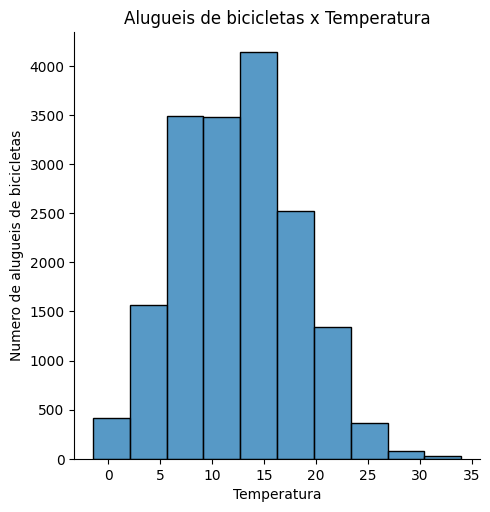

In [11]:
sns.displot(df_limpo, x='temperatura', bins=10)
plt.title("Alugueis de bicicletas x Temperatura")
plt.xlabel("Temperatura")
plt.ylabel("Numero de alugueis de bicicletas")
plt.show()

Histograma da sensação terminica

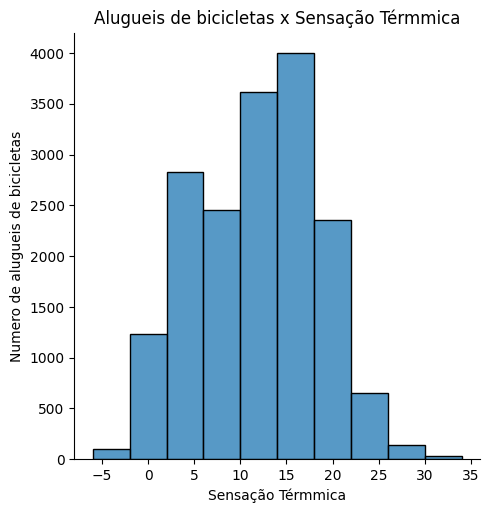

In [12]:
sns.displot(df_limpo, x='sensacao_termica', bins=10)
plt.title("Alugueis de bicicletas x Sensação Térmmica")
plt.xlabel("Sensação Térmmica")
plt.ylabel("Numero de alugueis de bicicletas")
plt.show()

Histograma da umidade - distorção para a esquerda

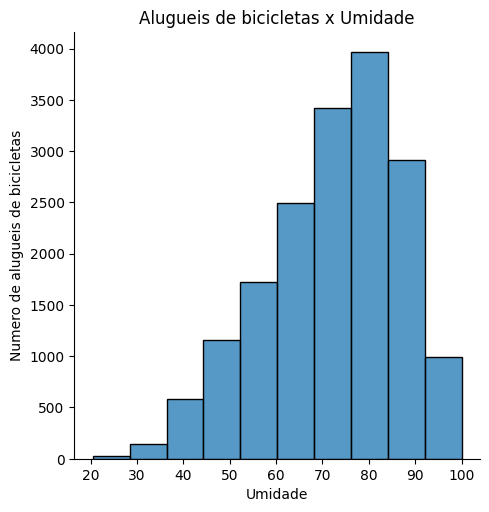

In [13]:
sns.displot(df_limpo, x='umidade', bins=10)
plt.title("Alugueis de bicicletas x Umidade")
plt.xlabel("Umidade")
plt.ylabel("Numero de alugueis de bicicletas")
plt.show()

Histograma da velocidade do vento - distorção para a direita

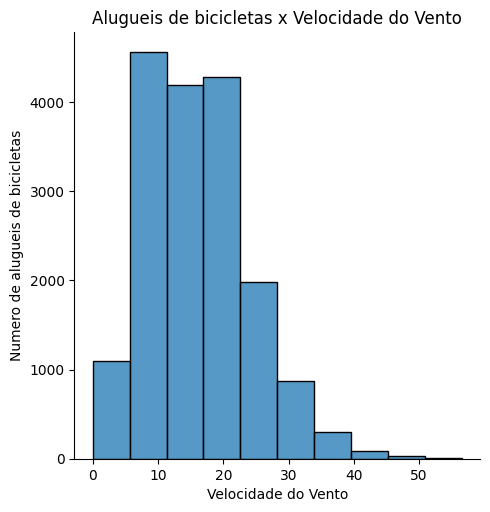

In [14]:
sns.displot(df_limpo, x='velocidade_vento', bins=10)
plt.title("Alugueis de bicicletas x Velocidade do Vento")
plt.xlabel("Velocidade do Vento")
plt.ylabel("Numero de alugueis de bicicletas")
plt.show()

**Contagem das bicicletas x Variaveis (Tempetarura, Sensação Térmica, Umidade e Velocidade do Vento)**

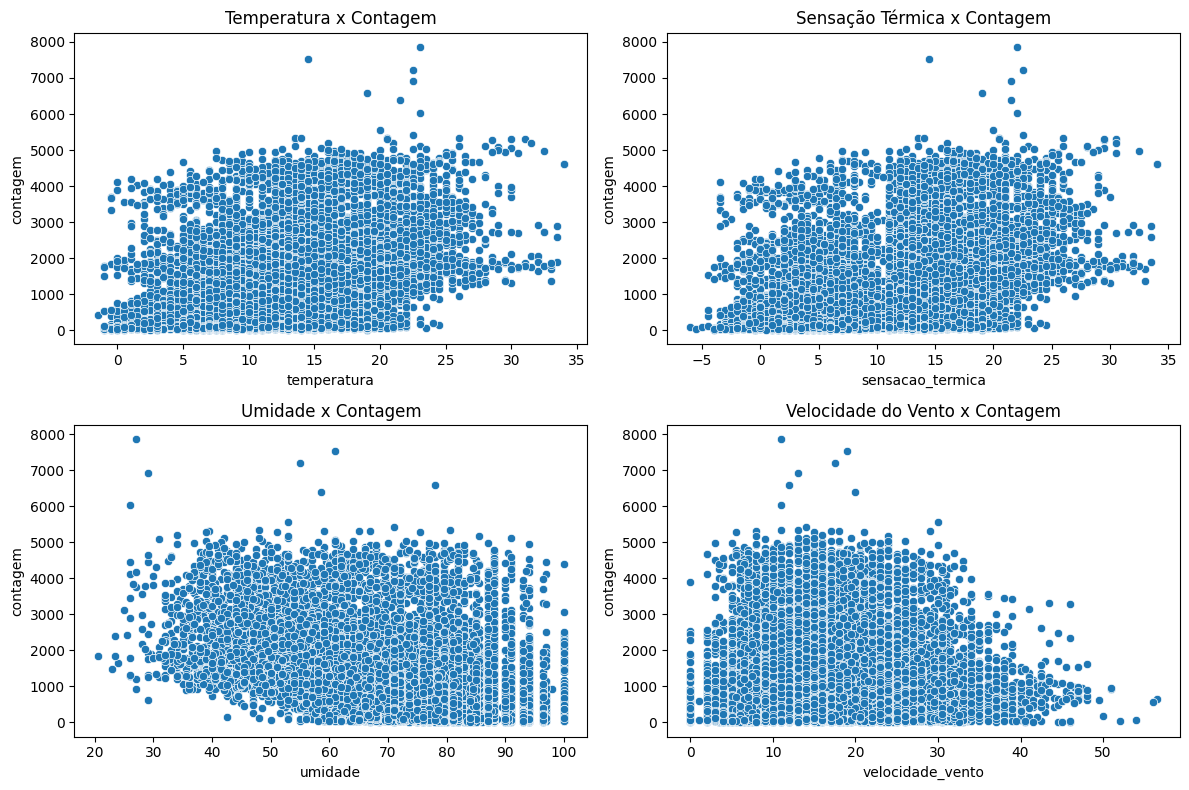

In [15]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

sns.scatterplot(ax=axes[0, 0], x='temperatura', y='contagem', data=df_limpo).set(title="Temperatura x Contagem")
sns.scatterplot(ax=axes[0, 1], x='sensacao_termica', y='contagem', data=df_limpo).set(title="Sensação Térmica x Contagem")
sns.scatterplot(ax=axes[1, 0], x='umidade', y='contagem', data=df_limpo).set(title="Umidade x Contagem")
sns.scatterplot(ax=axes[1, 1], x='velocidade_vento', y='contagem', data=df_limpo).set(title="Velocidade do Vento x Contagem")

plt.tight_layout()
plt.show()

Os gráficos não apresentam uma relação linear

temperatura/sensação termica
1. existe uma diminuição no alguel das bicicletas a partir dos 25C;

umidade e velocidade do vento


1.  há uma relação inversa com a temperatuar;
2.  umidade entre 50-90 apresenta uma demanda maior;
3. velocidade dos vento abaxo dos 30km tem uma demanda maior;



**Correlação entre as variaveis**

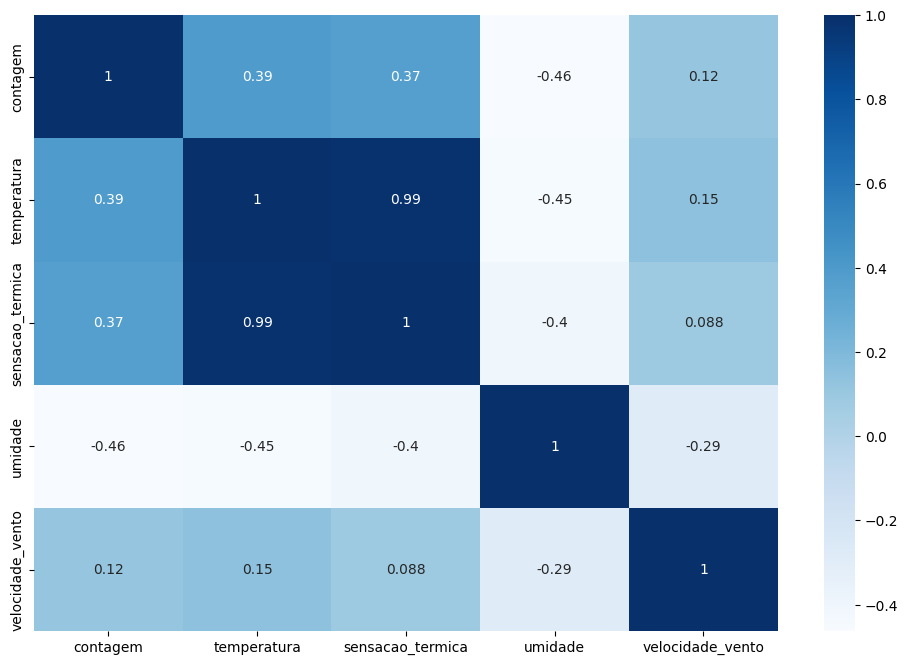

In [16]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_limpo.corr(numeric_only=True), annot=True, cmap='Blues')
plt.show()

**Força da correlação:**

|r| > 0.8: correlação forte.
 - temperatura e st (com já esperado)

0.5 ≤ |r| < 0.8: correlação moderada.

0.3 ≤ |r| < 0.5: correlação fraca.
 - contagem x temperatura, st e umidade

|r| < 0.3: correlação desprezível.
 - contgem x vento


**Estatístia descritiva das variaveis categorias dos dados**

In [17]:
df_limpo.describe(include=[object])

,data_hora,clima,feriado,fim_de_semana,estacao
count,17414,17414,17414,17414,17414
unique,17414,6,2,2,4
top,2017-01-03 23:00:00,Céu limpo,Não,Não,Primavera
freq,1,6150,17030,12444,4394


Analisando quais são os valores unicos das colunas "clima", "feriado", "fim_de_semana", "estacao"

In [18]:
for col in ["clima", "feriado", "fim_de_semana", "estacao"]:
  print(f'Coluna: {col}')
  print(df_limpo[col].unique())

Coluna: clima
['Nublado' 'Céu limpo' 'Parcialmente nublado' 'Chuva leve' 'Neve'
 'Chuva com trovoadas']
Coluna: feriado
['Não' 'Sim']
Coluna: fim_de_semana
['Sim' 'Não']
Coluna: estacao
['Inverno' 'Primavera' 'Verão' 'Outono']


Box-plot para analisar a diferença da demanda entre feriado e dias normais

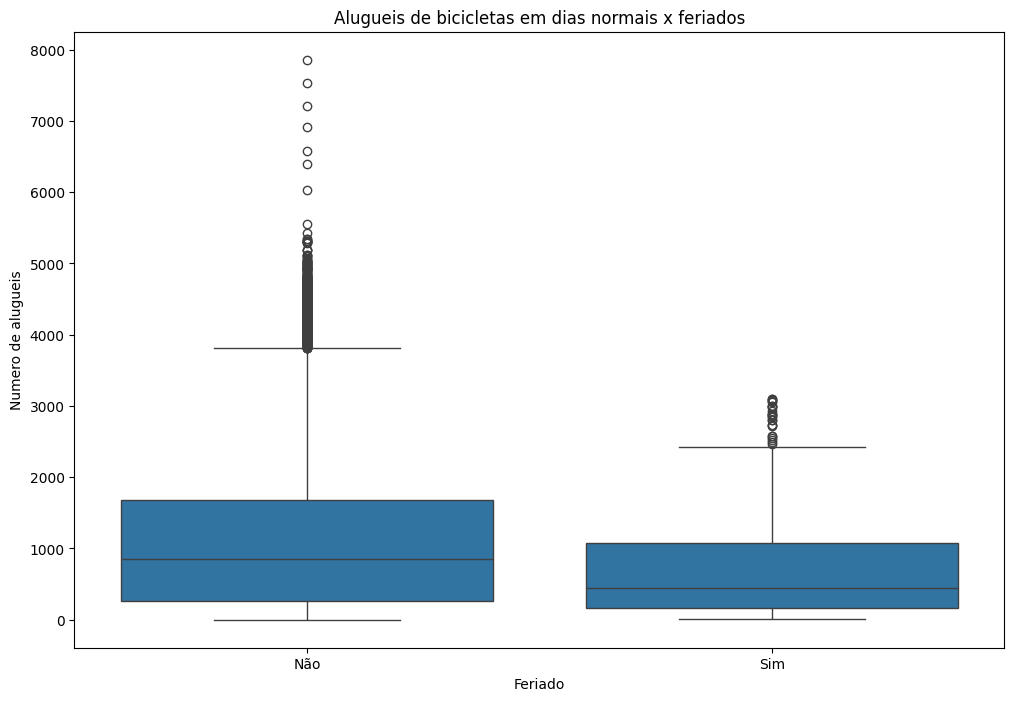

In [19]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_limpo, x='feriado', y='contagem')
plt.title("Alugueis de bicicletas em dias normais x feriados")
plt.xlabel("Feriado")
plt.ylabel("Numero de alugueis")
plt.show()

In [20]:
mediana_feriado = df_limpo.groupby('feriado')['contagem'].median()
print(mediana_feriado)

feriado
Não    855.0
Sim    439.5
Name: contagem, dtype: float64


É possível perceber que existe uma diferença considerável na mediana dos alugueis das bicicletas entre os dias de feriado (439) e não feriado (855), sendo dias normais (não feriado) apresentam uma maior demanda por bicicletas

além disso, o máximo superido e outliers são bem diferentes

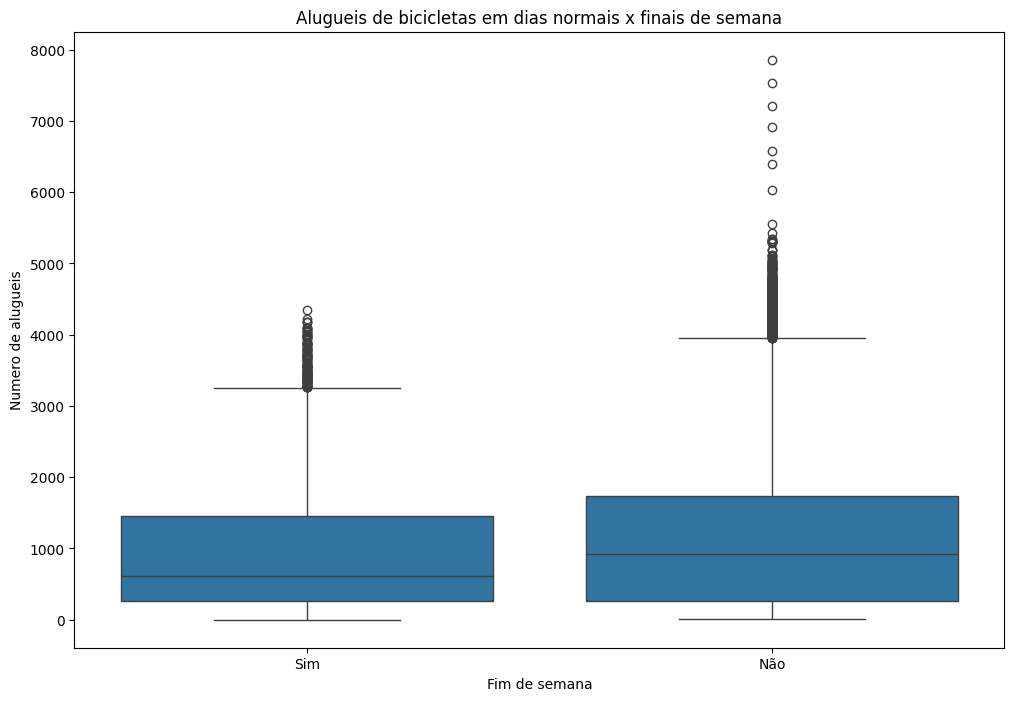

In [21]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_limpo, x='fim_de_semana', y='contagem')
plt.title("Alugueis de bicicletas em dias normais x finais de semana")
plt.xlabel("Fim de semana")
plt.ylabel("Numero de alugueis")
plt.show()

In [22]:
mediana_feriado = df_limpo.groupby('fim_de_semana')['contagem'].median()
print(mediana_feriado)

fim_de_semana
Não    927.0
Sim    619.0
Name: contagem, dtype: float64


Podemos perceber uma mudança por biclicleats na mediana entre dias da semana (927) e final de semana (619). além do limite superior e outliers

HIPÓTESE

Talvez, as bicicletas sejam utilizadas ao longo da semana como meio de locomoção/transporte para a ida e volta ao trabalho, faculdade, etc... e aos final de semana como meio de lazer

**Analisando a distribuição dos alugueis de bicicletas pelo Clima**



In [23]:
df_clima = df_limpo.groupby("clima").contagem.sum().reset_index().sort_values(by="contagem", ascending=False)
df_clima

,clima,contagem
2,Céu limpo,7146847
5,Parcialmente nublado,6965558
4,Nublado,4243887
1,Chuva leve,1526461
3,Neve,15051
0,Chuva com trovoadas,8168


Text(0.5, 0, 'Clima')

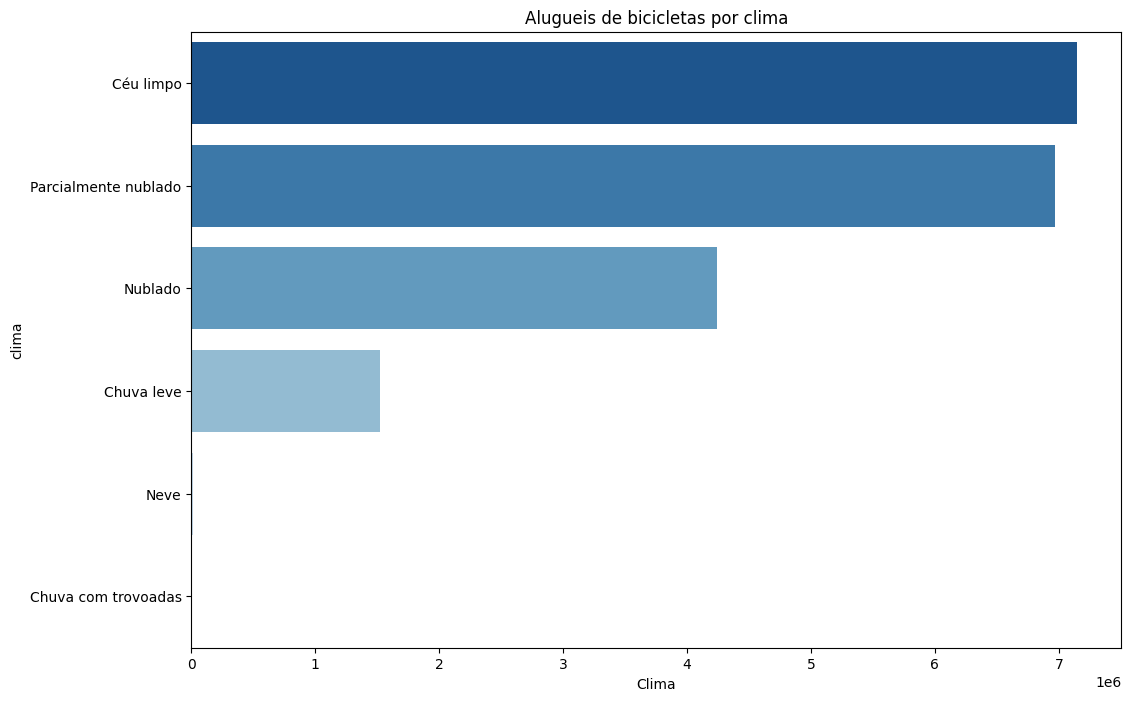

In [24]:
plt.figure(figsize=(12, 8))
sns.barplot(data=df_clima, y="clima", x="contagem", hue="clima", palette="Blues_r", orient="h")
plt.title("Alugueis de bicicletas por clima")
plt.xlabel("Clima")

Fica claro que os dias com Neve e Chuva com trovoada impactam negativamente o alguel de bicicletas e oposição aos dias com ceú claro ou parcialmente nublado

**Analisando a distribuição dos alugueis de bicicletas pela Estação do ano**

In [25]:
df_estacao = df_limpo.groupby("estacao").contagem.sum().reset_index().sort_values(by="contagem", ascending=False)
df_estacao

,estacao,contagem
3,Verão,6424609
1,Outono,5073040
2,Primavera,4850236
0,Inverno,3558087


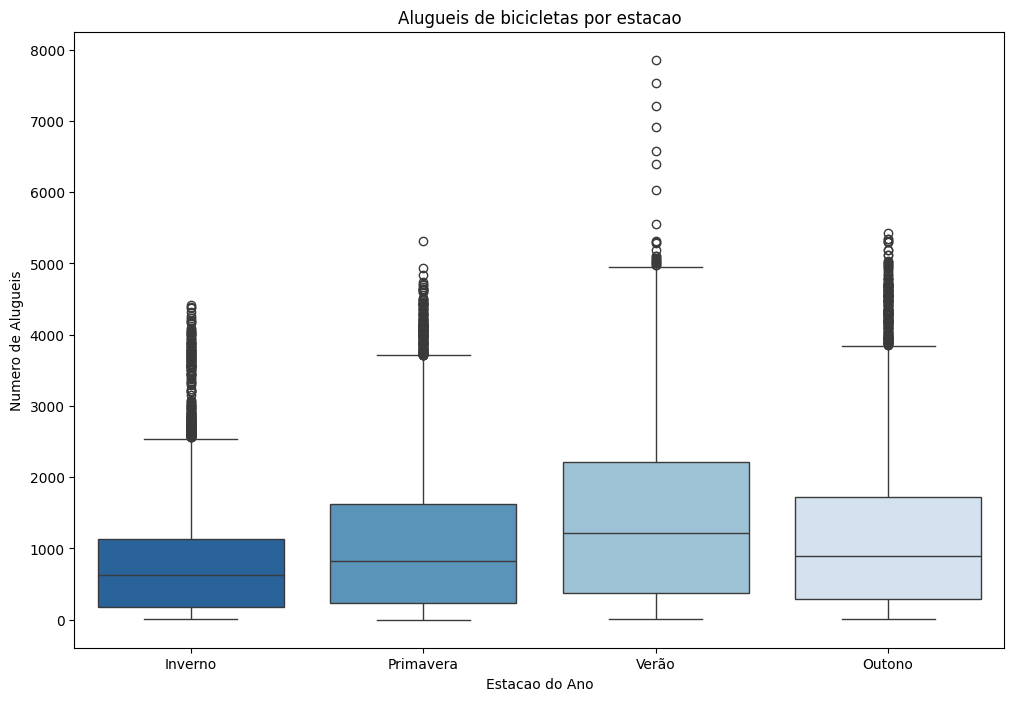

In [26]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_limpo, x="estacao", y="contagem", palette="Blues_r")
plt.title("Alugueis de bicicletas por estacao")
plt.xlabel("Estacao do Ano")
plt.ylabel("Numero de Alugueis")
plt.show()

In [27]:
df_limpo.groupby("estacao").contagem.median()

,contagem
estacao,
Inverno,632.0
Outono,898.0
Primavera,823.0
Verão,1214.0


Com o box-plot e mediana, fica evidente que a volumetria do aluguel da bicicletas é afetada pela estação do ano, sendo impactante para a analise a diferença entre Inverno e Verão (quase o dobro)

In [28]:
from scipy.stats import mannwhitneyu

primavera = df_limpo[df_limpo["estacao"] == "Primavera"].contagem
outono = df_limpo[df_limpo["estacao"] == "Outono"].contagem

u_statistic, p_value = mannwhitneyu(primavera, outono, alternative="two-sided")
u_statistic, p_value

(np.float64(9044682.5), np.float64(0.0004762100221646296))

**Teste de Hipótese**

O código realiza um teste para determinar se há diferença significativa no número de aluguéis de bicicletas entre a primavera e o outono.
Como rejeitamos a hipótese nula, temos uma diferença estatisticamente significante entre a distribuição dos alugueis de bicicleta entre Primavera e Outono

**Analise dos alugueis de bicicletas por hora**

Transpormando a variavel data_hora para o time datetime e obtendo as horas

In [29]:
# Convertendo a coluna 'data_hora' para o tipo datetime
df_limpo['data_hora'] = pd.to_datetime(df_limpo['data_hora'])

# Extraindo a hora da coluna 'data_hora'
df_limpo['hora'] = df_limpo['data_hora'].dt.hour

# Agrupando por hora e somando a contagem
contagem_por_hora = df_limpo.groupby('hora')['contagem'].sum()

Plotando o gráfico dos Algueis de bicicleta por hora do dia

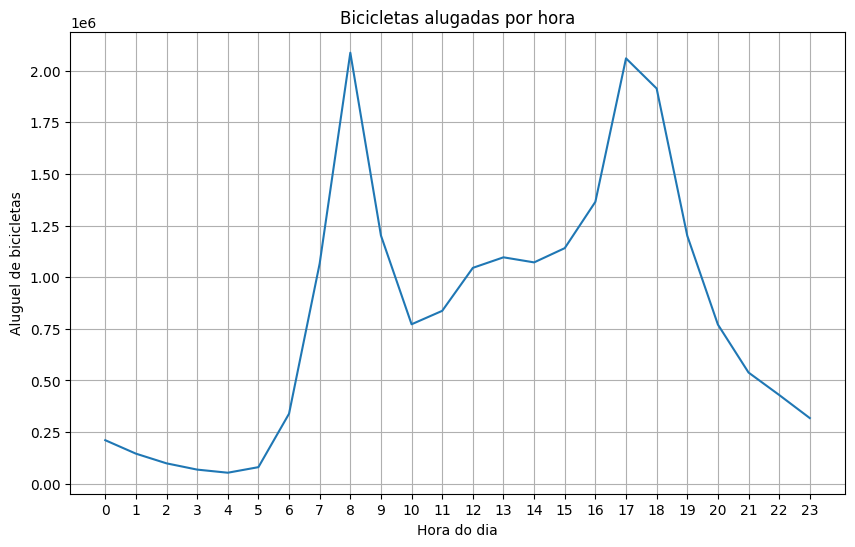

In [30]:
plt.figure(figsize=(10, 6))
plt.plot(contagem_por_hora.index, contagem_por_hora.values)
plt.xlabel('Hora do dia')
plt.ylabel('Aluguel de bicicletas')
plt.title('Bicicletas alugadas por hora')
plt.grid(True)
plt.xticks(range(24))
plt.show()

Os horários de pico na demanda por bicicleta se concentram em dois horário ao longo dia - 08h e 17h

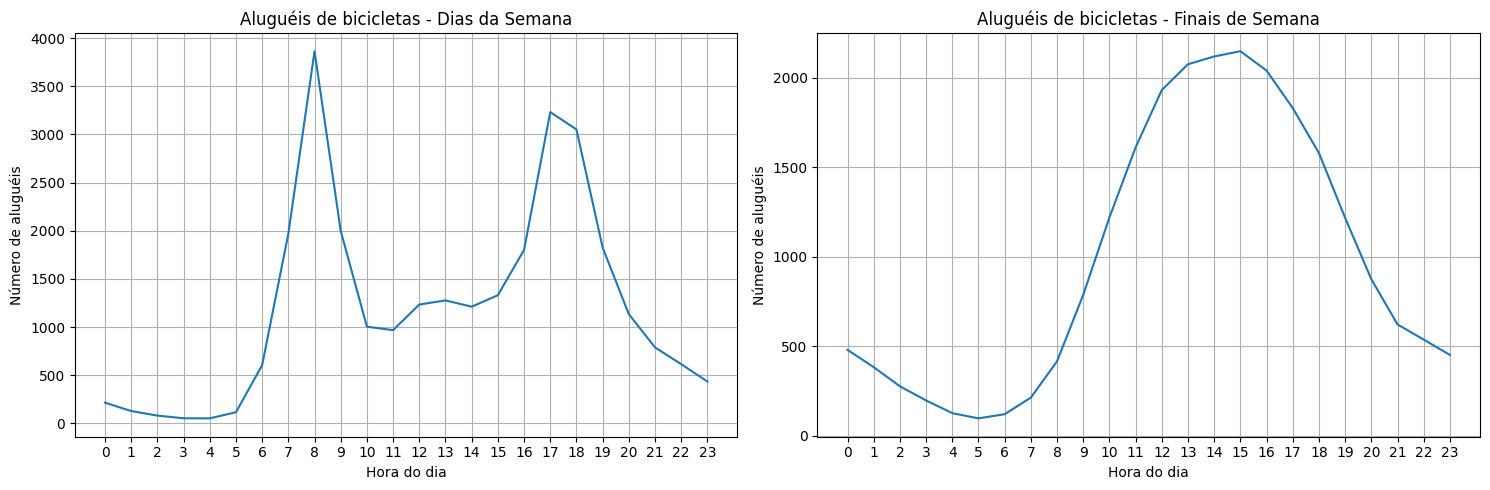

In [31]:
# Criando colunas para dia da semana e final de semana
df_limpo['dia_semana'] = df_limpo['data_hora'].dt.dayofweek
df_limpo['final_de_semana'] = df_limpo['dia_semana'] >= 5

# Criando os gráficos lado a lado
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Gráfico para dias da semana
sns.lineplot(ax=axes[0], x='hora', y='contagem', data=df_limpo[~df_limpo['final_de_semana']], ci=None)
axes[0].set_title('Aluguéis de bicicletas - Dias da Semana')
axes[0].set_xlabel('Hora do dia')
axes[0].set_ylabel('Número de aluguéis')
axes[0].set_xticks(range(24))
axes[0].grid(True) # adicionando linhas de grade

# Gráfico para finais de semana
sns.lineplot(ax=axes[1], x='hora', y='contagem', data=df_limpo[df_limpo['final_de_semana']], ci=None)
axes[1].set_title('Aluguéis de bicicletas - Finais de Semana')
axes[1].set_xlabel('Hora do dia')
axes[1].set_ylabel('Número de aluguéis')
axes[1].set_xticks(range(24))
axes[1].grid(True) # adicionando linhas de grade

plt.tight_layout()
plt.show()

Segregando os dados por dias da semana e final de semana percebemos um comportamento diferente

Para os dias da semana, continua valendo os horaros de pico das 8h e 17h

Mas para o final de semana, a concentração está entre as 13h-16h


**Evolução dos alugueis de bicicletas ao longo do tempo**

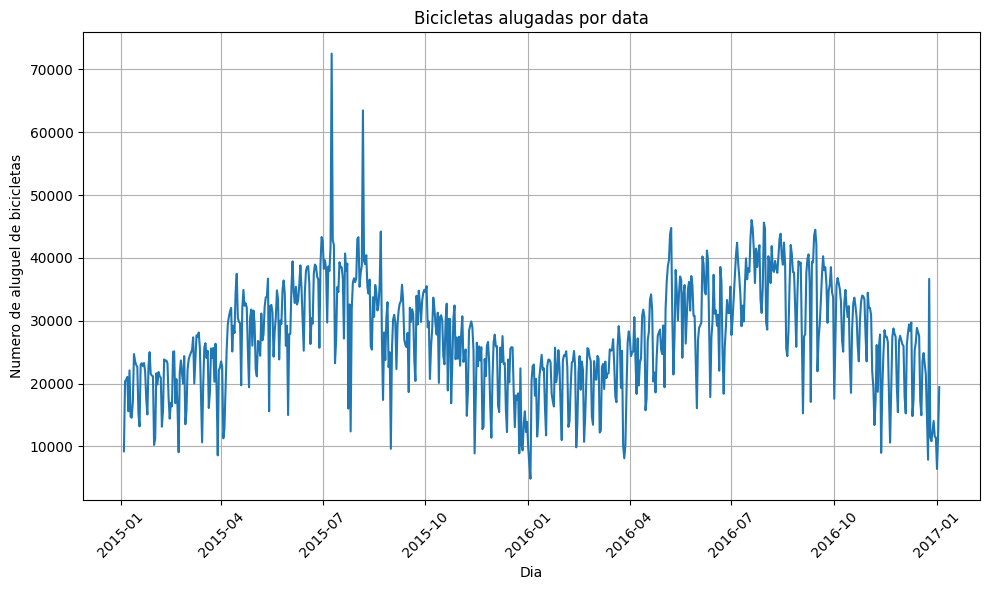

In [32]:
# Convertendo a coluna 'data_hora' para o tipo datetime (se ainda não estiver)
df_limpo['data_hora'] = pd.to_datetime(df_limpo['data_hora'])

# Extraindo o dia da coluna 'data_hora'
df_limpo['dia'] = df_limpo['data_hora'].dt.date

# Agrupando por dia e somando a contagem
contagem_por_dia = df_limpo.groupby('dia')['contagem'].sum()

# Criando o gráfico
plt.figure(figsize=(10, 6))
plt.plot(contagem_por_dia.index, contagem_por_dia.values)
plt.xlabel('Dia')
plt.ylabel('Numero de aluguel de bicicletas')
plt.title('Bicicletas alugadas por data')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**O que explica esse dois outliers em 2015?**

fazendo uma pesquisa, descobri que houve um grave no metro de londres (base do dataset) que explique esse aumenta na demanda por bicicletas

Além disso, é possível perceber que os dados apresentam uma sazonalidade, fazendo uma curva de cino, de acordo com os trimestres/estações do ano

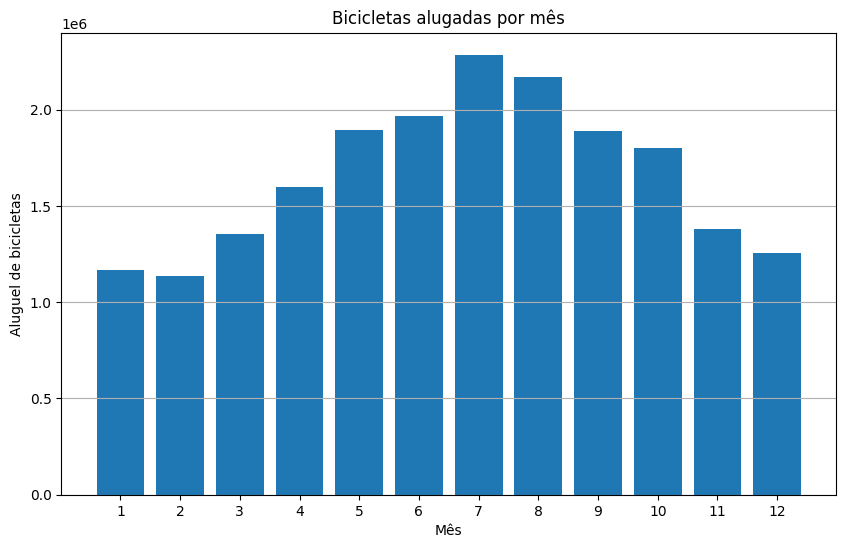

In [33]:
# Convertendo a coluna 'data_hora' para o tipo datetime, se ainda não estiver
if not pd.api.types.is_datetime64_any_dtype(df_limpo['data_hora']):
    df_limpo['data_hora'] = pd.to_datetime(df_limpo['data_hora'])

# Extraindo o mês da coluna 'data_hora'
df_limpo['mes'] = df_limpo['data_hora'].dt.month

# Agrupando por mês e somando a contagem
contagem_por_mes = df_limpo.groupby('mes')['contagem'].sum()

# Criando o gráfico
plt.figure(figsize=(10, 6))
plt.bar(contagem_por_mes.index, contagem_por_mes.values)
plt.xlabel('Mês')
plt.ylabel('Aluguel de bicicletas')
plt.title('Bicicletas alugadas por mês')
plt.xticks(contagem_por_mes.index) # Define os ticks do eixo x para cada mês
plt.grid(axis='y') # Adiciona grade apenas no eixo y
plt.show()

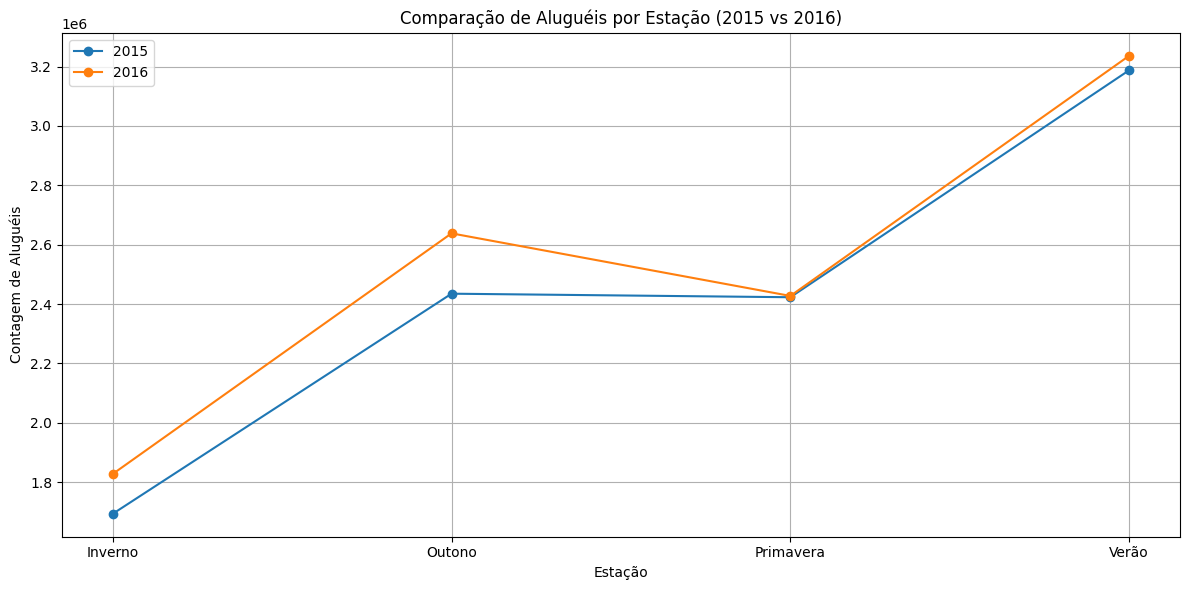

In [34]:
# Filtrar os dados para 2015 e 2016
df_2015 = df_limpo[df_limpo['data_hora'].dt.year == 2015]
df_2016 = df_limpo[df_limpo['data_hora'].dt.year == 2016]

# Agrupar por estação e calcular a soma da contagem para cada ano
contagem_estacao_2015 = df_2015.groupby('estacao')['contagem'].sum()
contagem_estacao_2016 = df_2016.groupby('estacao')['contagem'].sum()

# Criar o gráfico de barras lado a lado
plt.figure(figsize=(12, 6))

plt.plot(contagem_estacao_2015.index, contagem_estacao_2015.values, marker='o', label='2015')
plt.plot(contagem_estacao_2016.index, contagem_estacao_2016.values, marker='o', label='2016')

plt.xlabel('Estação')
plt.ylabel('Contagem de Aluguéis')
plt.title('Comparação de Aluguéis por Estação (2015 vs 2016)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

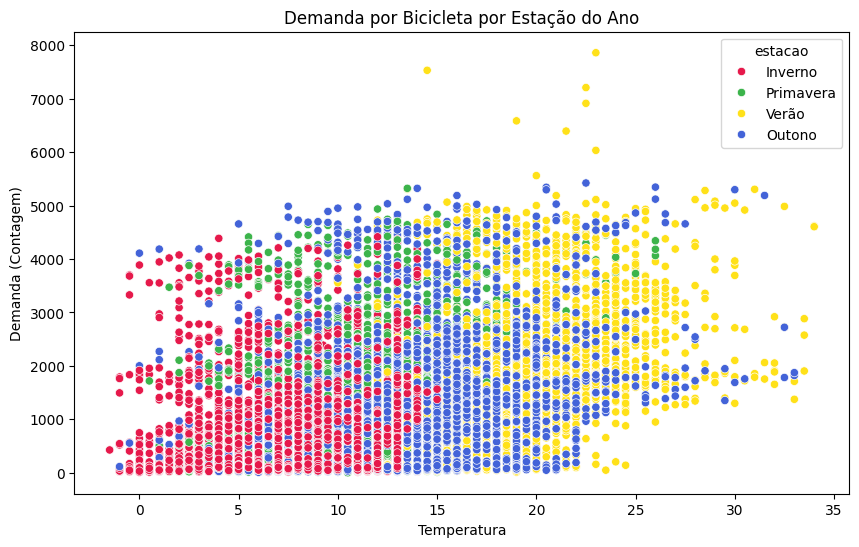

In [35]:
# scatterplot da demanda de bicliotecas pela estação do ano
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_limpo, x='temperatura', y='contagem', hue='estacao', palette=['#e6194b', '#3cb44b', '#ffe119', '#4363d8']) # Use distinct colors
plt.title('Demanda por Bicicleta por Estação do Ano')
plt.xlabel('Temperatura')
plt.ylabel('Demanda (Contagem)')
plt.show()